

```
# This is formatted as code
```

# Logistic Regression

Logistic Regression is used for classification.

In Logistic Regression Dependent variable has to be categorical.

Logistic Regression is statistcal analysis method to predict a binary outcome such as yes or no.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

### Data Load

In [ ]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

#### EDA

In [ ]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
df=data[data['species']!='setosa']# We are removing the setosa from the data and creating new data set

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [ ]:
df['species']=df['species'].map({'versicolor':0,'virginica':1})

<ipython-input-13-3b1decd9eb86>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['species']=df['species'].map({'versicolor':0,'virginica':1})


In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,0
51,6.4,3.2,4.5,1.5,0
52,6.9,3.1,4.9,1.5,0
53,5.5,2.3,4.0,1.3,0
54,6.5,2.8,4.6,1.5,0


### Spliting dataset into independet and dependent feature

In [ ]:
x=df.iloc[:,:-1] # In this we selecting all columns except the last column species
y=df.iloc[:,-1] # In this we selecting only the last column

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

classification=LogisticRegression()

In [ ]:
from sklearn.model_selection import GridSearchCV

para={'penalty':['11','12','elasticnet'],'C':[1,2,3,4,5,6,10,20,30,40,50],'max_iter':[100,200,300]}#Hyperparameter tuning

In [ ]:
classification_reg=GridSearchCV(classification,param_grid=para,scoring='accuracy',cv=5)

In [ ]:
classification_reg.fit(x_train,y_train)

ValueError: ignored

In [ ]:
classification_reg.best_score_

AttributeError: ignored

### Example 2

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv("/content/bank-full.csv")

In [ ]:
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
df.shape

(45211, 17)

In [ ]:
df['Target'].unique()

array(['no', 'yes'], dtype=object)

In [ ]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

<Axes: >

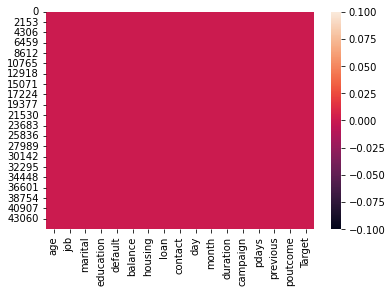

In [ ]:
sns.heatmap(df.isnull())

<Axes: >

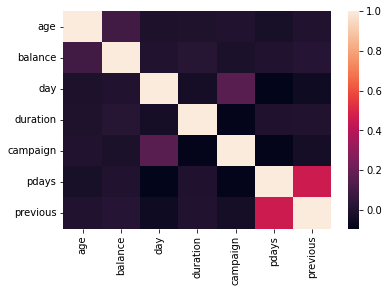

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
Target       object
dtype: object

In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

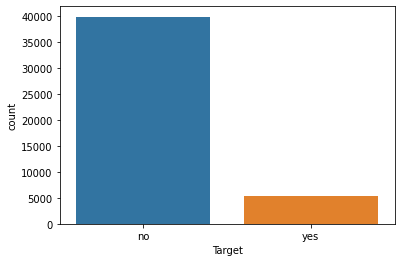

In [ ]:
import matplotlib.pyplot as plt
sns.countplot(data=df,x='Target')
plt.show()

### Now Split DataSet into 2 parts
### Numeric type and Categorical type


In [ ]:
df_num=df.select_dtypes(['int64','float64'])
df_cat=df.select_dtypes(object)

In [ ]:
df_num.head()

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [ ]:
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [ ]:
# To convert Categorical type data into numeric type
from sklearn.preprocessing import LabelEncoder

In [ ]:
for col in df_cat:
  le=LabelEncoder()
  df_cat[col]=le.fit_transform(df_cat[col])

In [ ]:
df_cat.dtypes

job          int64
marital      int64
education    int64
default      int64
housing      int64
loan         int64
contact      int64
month        int64
poutcome     int64
Target       int64
dtype: object

In [ ]:
df_new=pd.concat([df_num,df_cat],axis=1)

In [ ]:
df_new.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome,Target
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3,0
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3,0
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3,0
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3,0
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3,0


In [ ]:
x=df_new.drop('Target',axis=1)
y=df_new['Target']

In [ ]:
x.head()

,age,balance,day,duration,campaign,pdays,previous,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,4,1,2,0,1,0,2,8,3
1,44,29,5,151,1,-1,0,9,2,1,0,1,0,2,8,3
2,33,2,5,76,1,-1,0,2,1,1,0,1,1,2,8,3
3,47,1506,5,92,1,-1,0,1,1,3,0,1,0,2,8,3
4,33,1,5,198,1,-1,0,11,2,3,0,0,0,2,8,3


In [ ]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.3,random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
ss=StandardScaler()

In [ ]:
lr=LogisticRegression()

In [ ]:
lr.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
dict={'Actual Output':y_test,'Predicted Output':y_pred}
df1=pd.DataFrame(dict)
df1.head(26)

,Actual Output,Predicted Output
6149,0,0
12403,0,0
21645,0,0
29580,0,0
31245,0,0
32032,0,0
18295,0,0
42774,1,0
26345,0,0
31747,0,0


In [ ]:
lr.score(x_test,y_test)

0.887477486017632

### Example 2

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv('/content/titanic.csv')

In [ ]:
len(df)

418

In [ ]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
df.index

RangeIndex(start=0, stop=418, step=1)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.shape

(418, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Data Analysis

<Axes: xlabel='Survived', ylabel='count'>

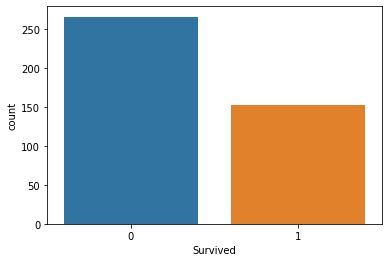

In [ ]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Survived', ylabel='count'>

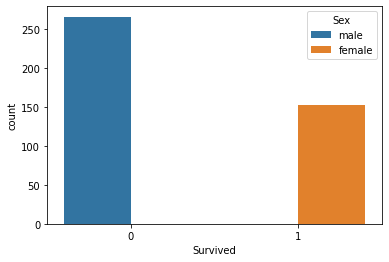

In [ ]:
sns.countplot(x='Survived',data=df,hue='Sex')

In [ ]:
df.isnull().sum()
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

<Axes: >

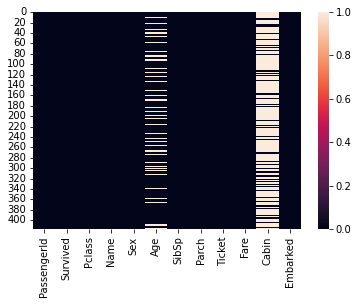

In [ ]:
sns.heatmap(df.isna())

In [ ]:
(df['Age'].isna().sum()/len(df['Age']))*100

20.574162679425836

In [ ]:
#Null Values in the cabin
(df['Cabin'].isna().sum()/len(df['Cabin']))*100

78.22966507177034

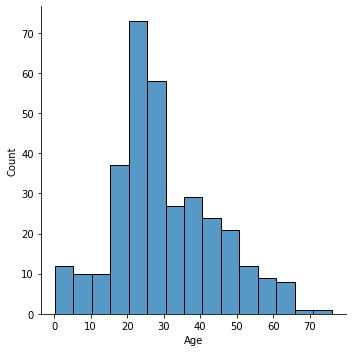

In [ ]:
sns.displot(x='Age',data=df)

### Data Cleaning

In [ ]:
# fill null Age column
# Inplace true replace inside into the table
mean_age=df['Age'].mean()
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [ ]:
df['Age'].isnull().sum()

0

In [ ]:
# Dropping the cabin column because null values more than 50%

df.drop('Cabin',axis=1,inplace=True)

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

### Preparing Data Model

In [ ]:
gender=pd.get_dummies(df['Sex'],drop_first=True)

In [ ]:
df['Gender']=gender

In [ ]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Gender'],
      dtype='object')

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0


In [ ]:
df.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,892,0,3,34.5,0,0,7.8292,1
1,893,1,3,47.0,1,0,7.0000,0
2,894,0,2,62.0,0,0,9.6875,1
3,895,0,3,27.0,0,0,8.6625,1
4,896,1,3,22.0,1,1,12.2875,0


In [ ]:
x=df[['PassengerId','Pclass','Age','SibSp	','Parch','Fare']]